# Source:

These solutions are based on the answers provided by Adrian Monninger, with very slight modifications.

# Problem Set 2-3: Plots to Explore the Perfect Foresight Model

## Exercise 1: 
PerfForesightCRRA derives a number of results as approximations; for instance, the exact formula for the consumption function is derived as
\begin{align}
    c_t = \Big(\frac{R-(R\beta)^{1/\rho}}{R}\Big)o_t
\end{align}
and approximated by
\begin{align}
    c_t \approx (r - \rho^{-1}(r - \mathscr{v}))o_t
\end{align}
and the saving rate is approximated in the last section.

For plausible values of the model parameters that satisfy the relevant impatience and human wealth conditions, make some plots examining the quality of those approximations. In particular, explore the relationship between the impatience conditions and the accuracy of the approximations.

### Answer:
The MPC ($\kappa$) depends on R, beta and rho. These parameters make a difference between true and approximated consumption. We observe different values for each parameter and assess the differences between the actual calculation of consumption and the approximated one.

In doing so, we observe three different cases for thorn:
1. thorn<1: "absolute impatience": consumer deliberately spends so much today that she will have to cut future spendings.
1. thorn>1: "absolute patience": the consumer wants to defer resources into the future in order to achieve consumption growth.
1. thorn=1: "absolutely poised"

Therefore, we have to make sure that Finite Human Wealth Condition (FHWC): $G<R$ and Relevant Impatience Condition (RIC): $thorn <R$ hold. While the first one is easy to check, as we only look at one period with a fixed human wealth coefficient. The second condition is important for the range of the parameters we choose.

Savings are defined as 
\begin{align}
    s_t = ra_{t-1} + p_t - c_t
\end{align}

Hence, approximation errors in consumption translate into errors in savings

case 1: thorn <1: "absolute impatience"


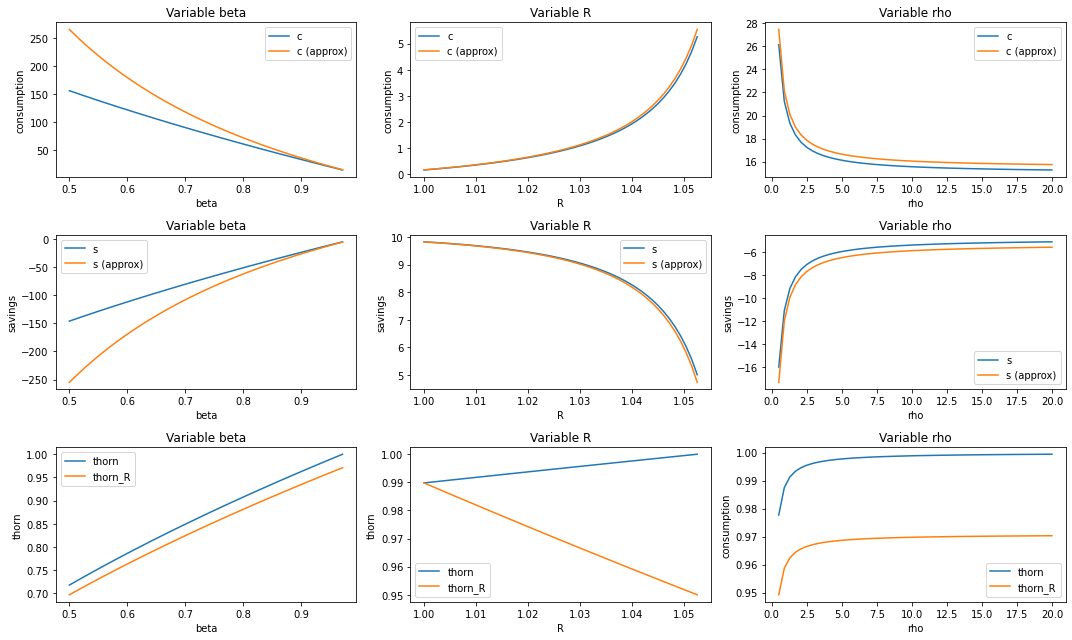

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
# case 1: thorn <1: "absolute impatience": consumer deliberately spends so much today that she will have to cut future spendings.

# previous savings, income, and Growth rate are fixed:
G = 1.01 # Due to FHWC
a = 5
p = 10

# a) variable beta
R = 1.03 # due to RIC: thorn should be smaller than R
r = R-1
beta_1 = np.linspace(0.5, 1/R, 50) # reasonable values: beta min=0.5
rho = 2

# define variables
v_1 = (1 - beta_1)/beta_1
thorn_1 = (𝚁*beta_1)**(1/rho)
thorn_R_1 = thorn_1/R

# Assume agent starts with no bank balances: overall wealth is just human wealth.

o = (p/(1-(G/R)))
# calculate c for different values of DiscFac
c_1 = o*(R-thorn_1)/R
# approximate c
c_app_1 = (r - (1/rho)*(r - v_1))*o

# savings
s_1 = r*a + p - c_1
s_app_1 = r*a + p - c_app_1

# b) variable R
beta = 0.95
rho = 5
R_2 = np.linspace(1, 1/beta, 50) # Due to RIC
r_2 = R_2-1
G_2 = np.linspace(0.4, (1/beta)-0.1, 50) # due to reasonable FHWC
# define variables
v_2 = (1 - beta)/beta
thorn_2 = (𝚁_2*beta)**(1/rho)
thorn_R_2 = thorn_2/R_2
o = (p/(1-(G_2/R_2)))

c_2 = o*(R_2-thorn_2)/R_2
# approximate c
c_app_2 = (r_2 - (1/rho)*(r_2 - v_2))*o

# savings
s_2 = r_2*a + p - c_2
s_app_2 = r_2*a + p - c_app_2

# c) variable rho
beta = 0.96
R = 1.03
r = R-1
rho_3 = np.linspace(.5, 20, 50) 

# define variables
v_3 = (1 - beta)/beta
thorn_3 = (𝚁*beta)**(1/rho_3)
thorn_R_3 = thorn_3/R
o = (p/(1-(G/R)))

c_3 = o*(R-thorn_3)/R
# approximate c
c_app_3 = (r - (1/rho_3)*(r - v_3))*o

# savings
s_3 = r*a + p - c_3
s_app_3 = r*a + p - c_app_3

print('case 1: thorn <1: "absolute impatience"')

# plot 
fig, ax = plt.subplots(3,3,figsize=[15,9])

# beta
#consumption
ax[0,0].plot(beta_1, c_1, label='c')
ax[0,0].plot(beta_1, c_app_1, label='c (approx)')
ax[0,0].set_xlabel('beta')
ax[0,0].set_ylabel('consumption')
ax[0,0].title.set_text('Variable beta')
ax[0,0].legend()

# saving
ax[1,0].plot(beta_1,s_1, label='s')
ax[1,0].plot(beta_1,s_app_1, label='s (approx)')
ax[1,0].set_xlabel('beta')
ax[1,0].set_ylabel('savings')
ax[1,0].title.set_text('Variable beta')
ax[1,0].legend()

# thorn
ax[2,0].plot(beta_1,thorn_1, label='thorn')
ax[2,0].plot(beta_1,thorn_R_1, label='thorn_R')
ax[2,0].set_xlabel('beta')
ax[2,0].set_ylabel('thorn')
ax[2,0].title.set_text('Variable beta')
ax[2,0].legend()

# R
#consumption
ax[0,1].plot(R_2,c_2, label='c')
ax[0,1].plot(R_2,c_app_2, label='c (approx)')
ax[0,1].set_xlabel('R')
ax[0,1].set_ylabel('consumption')
ax[0,1].title.set_text('Variable R')
ax[0,1].legend()

# saving
ax[1,1].plot(R_2,s_2, label='s')
ax[1,1].plot(R_2,s_app_2, label='s (approx)')
ax[1,1].set_xlabel('R')
ax[1,1].set_ylabel('savings')
ax[1,1].title.set_text('Variable R')
ax[1,1].legend()

# thorn
ax[2,1].plot(R_2,thorn_2, label='thorn')
ax[2,1].plot(R_2, thorn_R_2, label='thorn_R')
ax[2,1].set_xlabel('R')
ax[2,1].set_ylabel('thorn')
ax[2,1].title.set_text('Variable R')
ax[2,1].legend()

# rho
#consumption
ax[0,2].plot(rho_3,c_3, label='c')
ax[0,2].plot(rho_3,c_app_3, label='c (approx)')
ax[0,2].set_xlabel('rho')
ax[0,2].set_ylabel('consumption')
ax[0,2].title.set_text('Variable rho')
ax[0,2].legend()

# saving
ax[1,2].plot(rho_3,s_3, label='s')
ax[1,2].plot(rho_3,s_app_3, label='s (approx)')
ax[1,2].set_xlabel('rho')
ax[1,2].set_ylabel('savings')
ax[1,2].title.set_text('Variable rho')
ax[1,2].legend()

ax[2,2].plot(rho_3,thorn_3, label='thorn')
ax[2,2].plot(rho_3,thorn_R_3, label='thorn_R')
ax[2,2].set_xlabel('rho')
ax[2,2].set_ylabel('consumption')
ax[2,2].title.set_text('Variable rho')
ax[2,2].legend()

fig.tight_layout()

case 2: thorn >1: "absolute patience"


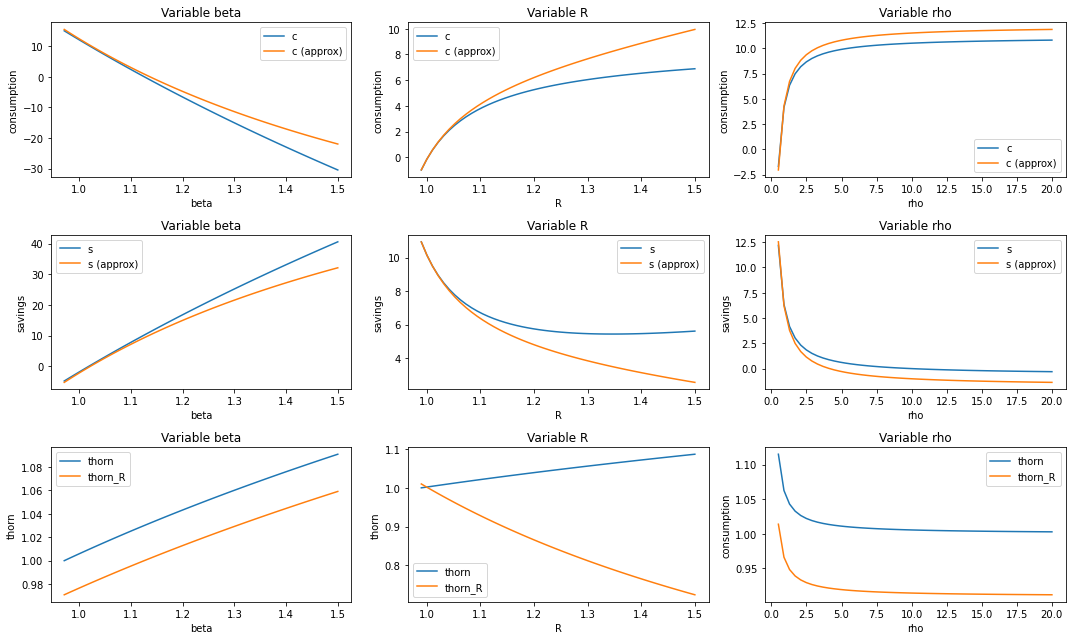

In [2]:
# case 2: thorn >1: "absolute patience": the consumer wants to defer resources into the future in order to achieve consumption growth.
# previous savings, income, and Growth rate are fixed:
G = 1.01
a = 5
p = 10

# a) variable beta
R = 1.03
r = R-1
beta_1 = np.linspace(1/R, 1.5, 50) # reasonable values: beta max=1.5
rho = 5

# define variables
v_1 = (1 - beta_1)/beta_1
thorn_1 = (𝚁*beta_1)**(1/rho)
thorn_R_1 = thorn_1/R
o = (p/(1-(G/R)))

# calculate c for different values of DiscFac
c_1 = o*(R-thorn_1)/R
# approximate c
c_app_1 = (r - (1/rho)*(r - v_1))*o

# savings
s_1 = r*a + p - c_1
s_app_1 = r*a + p - c_app_1

# b) variable R
beta = 1.01
rho = 5
R_2 = np.linspace(1/beta, 1.5, 50) #max 1 due to RIC
G_2 = np.linspace((1/beta)-0.1, 1-0.1, 50) # due to reasonable FHWC
r_2 = R_2-1

# define variables
v_2 = (1 - beta)/beta
thorn_2 = (𝚁_2*beta)**(1/rho)
thorn_R_2 = thorn_2/R_2
o = (p/(1-(G_2/R_2)))

# calculate c for different values R
c_2 = o*(R_2-thorn_2)/R_2
# approximate c
c_app_2 = (r_2 - (1/rho)*(r_2 - v_2))*o

# savings
s_2 = r_2*a + p - c_2
s_app_2 = r_2*a + p - c_app_2

# c) variable rho
beta = 0.96
R = 1.1
r = R-1
rho_3 = np.linspace(0.5, 20, 50) 

# define variables
v_3 = (1 - beta)/beta
thorn_3 = (𝚁*beta)**(1/rho_3)
thorn_R_3 = thorn_3/R
o = (p/(1-(G/R)))

# calculate c for different values of R
c_3 = o*(R-thorn_3)/R
# approximate c
c_app_3 = (r - (1/rho_3)*(r - v_3))*o

# savings
s_3 = r*a + p - c_3
s_app_3 = r*a + p - c_app_3

print('case 2: thorn >1: "absolute patience"')

# plot 
fig, ax = plt.subplots(3,3,figsize=[15,9])

# beta
#consumption
ax[0,0].plot(beta_1, c_1, label='c')
ax[0,0].plot(beta_1, c_app_1, label='c (approx)')
ax[0,0].set_xlabel('beta')
ax[0,0].set_ylabel('consumption')
ax[0,0].title.set_text('Variable beta')
ax[0,0].legend()

# saving
ax[1,0].plot(beta_1,s_1, label='s')
ax[1,0].plot(beta_1,s_app_1, label='s (approx)')
ax[1,0].set_xlabel('beta')
ax[1,0].set_ylabel('savings')
ax[1,0].title.set_text('Variable beta')
ax[1,0].legend()

# thorn
ax[2,0].plot(beta_1,thorn_1, label='thorn')
ax[2,0].plot(beta_1,thorn_R_1, label='thorn_R')
ax[2,0].set_xlabel('beta')
ax[2,0].set_ylabel('thorn')
ax[2,0].title.set_text('Variable beta')
ax[2,0].legend()

# R
#consumption
ax[0,1].plot(R_2,c_2, label='c')
ax[0,1].plot(R_2,c_app_2, label='c (approx)')
ax[0,1].set_xlabel('R')
ax[0,1].set_ylabel('consumption')
ax[0,1].title.set_text('Variable R')
ax[0,1].legend()

# saving
ax[1,1].plot(R_2,s_2, label='s')
ax[1,1].plot(R_2,s_app_2, label='s (approx)')
ax[1,1].set_xlabel('R')
ax[1,1].set_ylabel('savings')
ax[1,1].title.set_text('Variable R')
ax[1,1].legend()

# thorn
ax[2,1].plot(R_2,thorn_2, label='thorn')
ax[2,1].plot(R_2, thorn_R_2, label='thorn_R')
ax[2,1].set_xlabel('R')
ax[2,1].set_ylabel('thorn')
ax[2,1].title.set_text('Variable R')
ax[2,1].legend()

# rho
#consumption
ax[0,2].plot(rho_3,c_3, label='c')
ax[0,2].plot(rho_3,c_app_3, label='c (approx)')
ax[0,2].set_xlabel('rho')
ax[0,2].set_ylabel('consumption')
ax[0,2].title.set_text('Variable rho')
ax[0,2].legend()

# saving
ax[1,2].plot(rho_3,s_3, label='s')
ax[1,2].plot(rho_3,s_app_3, label='s (approx)')
ax[1,2].set_xlabel('rho')
ax[1,2].set_ylabel('savings')
ax[1,2].title.set_text('Variable rho')
ax[1,2].legend()

ax[2,2].plot(rho_3,thorn_3, label='thorn')
ax[2,2].plot(rho_3,thorn_R_3, label='thorn_R')
ax[2,2].set_xlabel('rho')
ax[2,2].set_ylabel('consumption')
ax[2,2].title.set_text('Variable rho')
ax[2,2].legend()

fig.tight_layout()

case 3: thorn = 1: absolutely poised


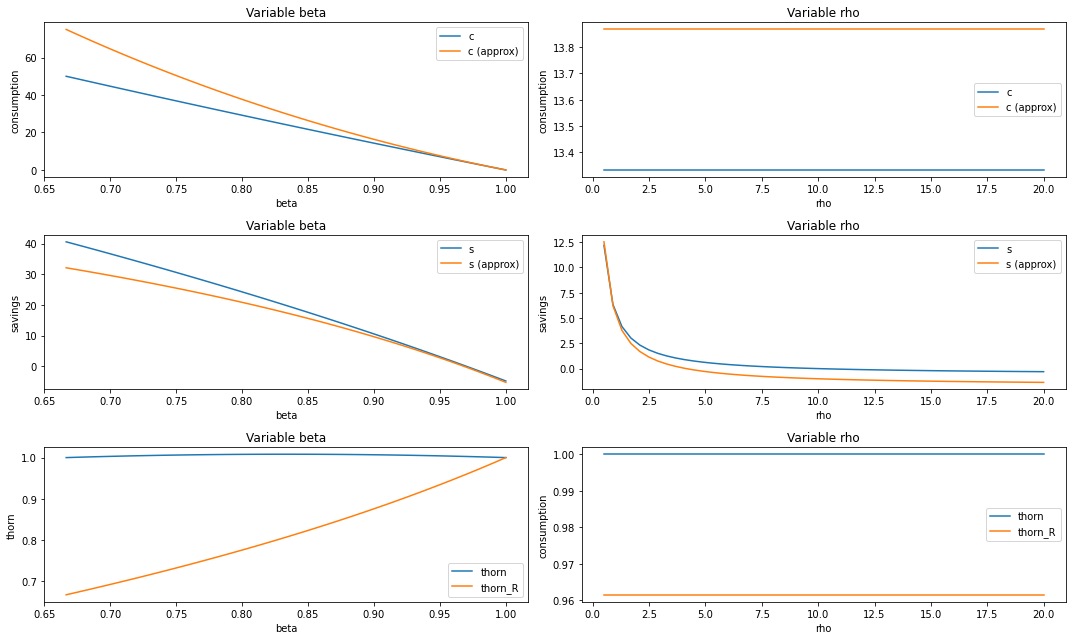

In [3]:
# case 3: thorn = 1: absolutely poised
# previous savings, income are fixed:
a = 5
p = 10

# a) variable beta and R
R_1 = np.linspace(1, 1.5, 50) # R > thorn = 1 (RIC)
r_1 = R_1-1
beta_1 = np.linspace(1, 1/1.5, 50)
rho = 5
G_1 = np.linspace(0.9, 1.4, 50) # due to reasonable FHWC
# define variables
v_1 = (1 - beta_1)/beta_1
thorn_1 = (𝚁_1*beta_1)**(1/rho)
thorn_R_1 = thorn_1/R_1
o = (p/(1-(G_1/R_1)))

# calculate c for different values of DiscFac
c_1 = o*(R_1-thorn_1)/R_1
# approximate c
c_app_1 = (r_1 - (1/rho)*(r_1 - v_1))*o

# b) variable rho
R = 1.04 # due to RIC
G = 1.01 # due to FHWC
beta = 1/R
r = R-1
rho_3 = np.linspace(0.5, 20, 50) 

# define variables
v_3 = (1 - beta)/beta
thorn_3 = (𝚁*beta)**(1/rho_3)
thorn_R_3 = thorn_3/R
o = (p/(1-(G/R)))

# calculate c for different values of DiscFac
c_3 = o*(R-thorn_3)/R
# approximate c
c_app_3 = (r - (1/rho_3)*(r - v_3))*o

print('case 3: thorn = 1: absolutely poised')
# plot 
fig, ax = plt.subplots(3,2,figsize=[15,9])

# beta
#consumption
ax[0,0].plot(beta_1, c_1, label='c')
ax[0,0].plot(beta_1, c_app_1, label='c (approx)')
ax[0,0].set_xlabel('beta')
ax[0,0].set_ylabel('consumption')
ax[0,0].title.set_text('Variable beta')
ax[0,0].legend()

# saving
ax[1,0].plot(beta_1,s_1, label='s')
ax[1,0].plot(beta_1,s_app_1, label='s (approx)')
ax[1,0].set_xlabel('beta')
ax[1,0].set_ylabel('savings')
ax[1,0].title.set_text('Variable beta')
ax[1,0].legend()

# thorn
ax[2,0].plot(beta_1,thorn_1, label='thorn')
ax[2,0].plot(beta_1,thorn_R_1, label='thorn_R')
ax[2,0].set_xlabel('beta')
ax[2,0].set_ylabel('thorn')
ax[2,0].title.set_text('Variable beta')
ax[2,0].legend()

# rho
#consumption
ax[0,1].plot(rho_3,c_3, label='c')
ax[0,1].plot(rho_3,c_app_3, label='c (approx)')
ax[0,1].set_xlabel('rho')
ax[0,1].set_ylabel('consumption')
ax[0,1].title.set_text('Variable rho')
ax[0,1].legend()

# saving
ax[1,1].plot(rho_3,s_3, label='s')
ax[1,1].plot(rho_3,s_app_3, label='s (approx)')
ax[1,1].set_xlabel('rho')
ax[1,1].set_ylabel('savings')
ax[1,1].title.set_text('Variable rho')
ax[1,1].legend()

ax[2,1].plot(rho_3,thorn_3, label='thorn')
ax[2,1].plot(rho_3,thorn_R_3, label='thorn_R')
ax[2,1].set_xlabel('rho')
ax[2,1].set_ylabel('consumption')
ax[2,1].title.set_text('Variable rho')
ax[2,1].legend()

fig.tight_layout()

### Conclusion
This exercise shows that the approximation is very close to the true consumption if beta and R are close to 1 (which makes sense, based on the way the approximation is done). In specific, values for R and beta which are more than 30% off are critical.

Interestingly, rho does not play such a large role. While for large $\rho$’s the difference between the consumption series is visible, it does not increase at a certain level.

For savings, this problem holds as well, based on the fact, that savings is the difference between income and consumption.

To sum up, the consumption approximation works for most reasonable cases. Reasonable means that interest rates are usually less than 10% and impatience between periods is not very large.

## Exercise 2:
Make some plots that illustrate the points made in sections 4.1 and 4.2 of PerfForesightCRRA about the size of the human wealth effect and the relationship between interest rates and the saving rate.

### a) Size of human wealth effect
We take equation (35) and choose different values for $\beta$($v$), $r$, $\rho$, $g$. This shows how the size of the human wealth effect depends on each parameter. Additionally it shows that the human wealth effect is large.
To not run into trouble, we make sure that the RIC (thorn_g <0) and FHIWC (r>g) holds

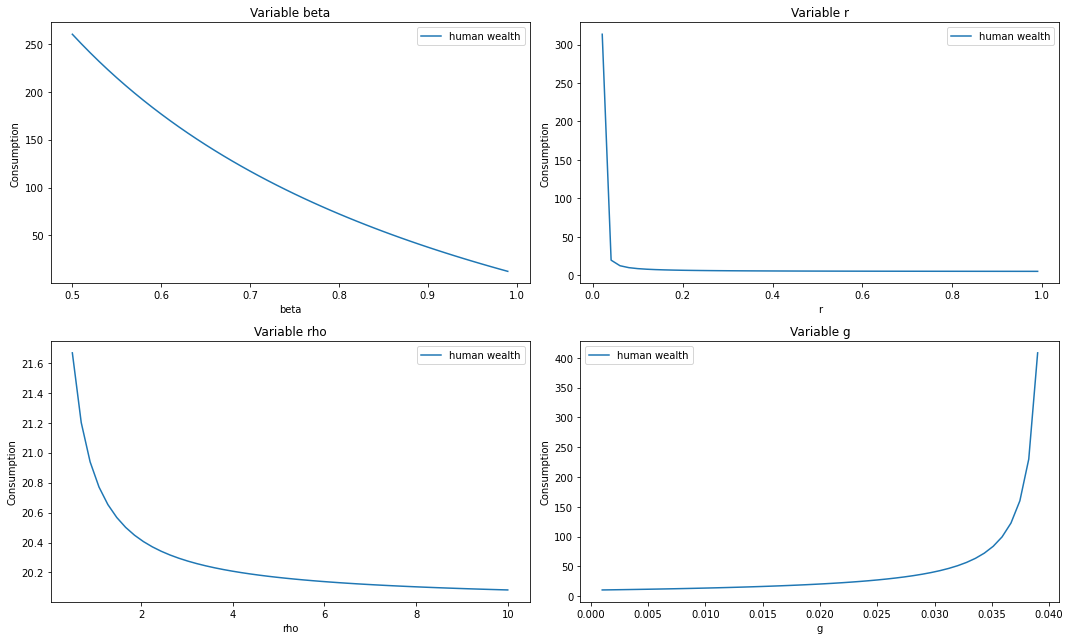

In [4]:
# variable beta
p = 10
r = 0.04
beta_1 = np.linspace(0.5, 0.99, 50)
v_1 = (1 - beta_1)/beta_1
g = 0.02
rho = 2

thorn_g = rho**(-1) * (r - v_1) - g
c_1 = p*(1 - thorn_g/(r - g))

# variable R
p = 10
r_2 = np.linspace(0.021, 0.99, 50)
beta = 0.96
v = (1 - beta)/beta
g = 0.02
rho = 2

thorn_g = rho**(-1) * (r_2 - v) - g
c_2 = p*(1 - thorn_g/(r_2 - g))

# variable rho
p = 10
r = 0.04
beta = 0.96
v = (1 - beta)/beta
g = 0.02
rho_3 = np.linspace(0.5, 10, 50)

thorn_g = rho_3**(-1) * (r - v) - g
c_3 = p*(1 - thorn_g/(r - g))

# variable g
p = 10
r = 0.04
beta = 0.96
v = (1 - beta)/beta
g_4 = np.linspace(0.001, 0.039, 50)
rho = 2

thorn_g = rho**(-1) * (r - v) - g_4
c_4 = p*(1 - thorn_g/(r - g_4))

# plot 
fig, bx = plt.subplots(2,2,figsize=[15,9])

# beta
bx[0,0].plot(beta_1, c_1, label='human wealth')
bx[0,0].set_xlabel('beta')
bx[0,0].set_ylabel('Consumption')
bx[0,0].title.set_text('Variable beta')
bx[0,0].legend()

#R
bx[0,1].plot(r_2,c_2, label='human wealth')
bx[0,1].set_xlabel('r')
bx[0,1].set_ylabel('Consumption')
bx[0,1].title.set_text('Variable r')
bx[0,1].legend()

# rho
bx[1,0].plot(rho_3,c_3, label='human wealth')
bx[1,0].set_xlabel('rho')
bx[1,0].set_ylabel('Consumption')
bx[1,0].title.set_text('Variable rho')
bx[1,0].legend()

# g
bx[1,1].plot(g_4,c_4, label='human wealth')
bx[1,1].set_xlabel('g')
bx[1,1].set_ylabel('Consumption')
bx[1,1].title.set_text('Variable g')
bx[1,1].legend()


fig.tight_layout()

### Conclusion:
We can see that the human wealth effect is indeed sizable!

However, each parameter has a different influence on it. While this is already visible from the formula, the pictures illustrate the relationship very nicely.

1. A smaller beta increases the human wealth effect.
Beta is the patience factor. If you are less patient (smaller beta), the agent will consume more today. This increases the effect.
1. rho increases the human wealth effect if little
A rho close to 0 means that the agent does not care in which period consumption should take place. Hence, the human wealth effect gets larger, as less income needs to be saved.
1. r is only important if it gets close to g
1. g increases the effect if it gets closer to r
When r = g, interest rates and income growth have the same size. Therefore, the agent converges to the finite human wealth condition. If this is true, the present discount value of future income would be infinite.

### Relationship between interest rates and saving rate
\begin{align}
    \zeta_t = \frac{thorn_g/(r - g) + \rho^{-1}(r - v)a_{t-1}}{1 + ra_{t-1}}
\end{align}

The points which are made are:
1. When $a_{t-1}$ approaches infinity, the saving rate converges to a constant
1. sign of the saving rate depends on thorn for a large enough $a_{t-1}$
1. The response of the saving rate to the interest rate depends on $\rho^{-1}vr^{-2}$

#### 1. When  $a_{t-1}$  approaches infinity, the saving rate converges to a constant

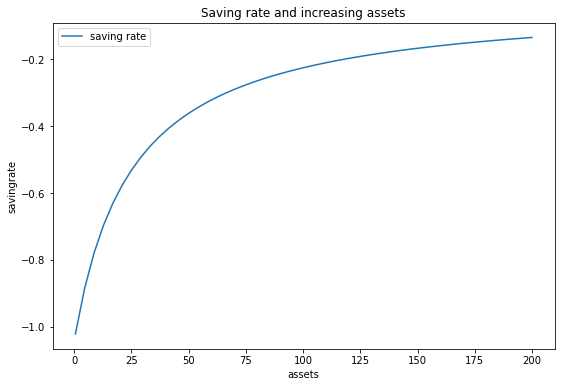

In [5]:
# inputs
p = 10
r = 0.04
beta = 0.96
v = (1 - beta)/beta
g = 0.02
rho = 2
a_1 = np.linspace(0.5, 200, 50)

thorn_g = rho**(-1)*(r - v) - g
zeta = (thorn_g/(r-g) + (rho**(-1))*(r-v)*a_1)/(1 + r*a_1)

# plot
plt.figure(figsize=(9,6))
plt.plot(a_1, zeta, label = 'saving rate')
plt.title('Saving rate and increasing assets')
plt.xlabel('assets')
plt.ylabel('savingrate')
plt.legend()
plt.show()

## Conclusion
As predicted, the saving rate converges to a constant with increasing assets.

#### 2. sign of the saving rate depends on thorn

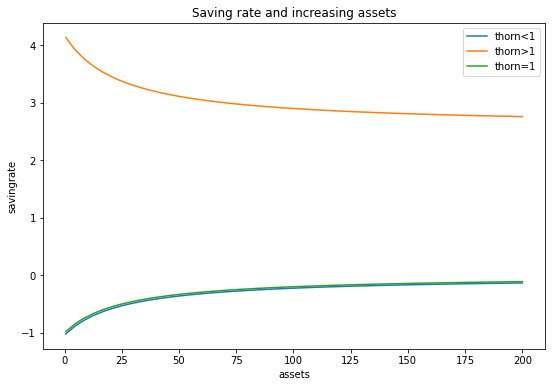

In [6]:
#1. thorn<1
# inputs
p = 10
r = 0.04
R = 1+r
beta = 0.96
v = (1 - beta)/beta
g = 0.02
rho = 2
a_1 = np.linspace(0.5, 200, 50)

thorn_1 = (𝚁*beta)**(1/rho)
thorn_g = rho**(-1)*(r - v) - g
zeta_1 = (thorn_g/(r-g) + (rho**(-1))*(r-v)*a_1)/(1 + r*a_1)

#2. thorn>1
# inputs
p = 10
r = 0.04
R = 1+r
beta = 1.2
v = (1 - beta)/beta
g = 0.02
rho = 2
a_1 = np.linspace(0.5, 200, 50)

thorn_2 = (𝚁*beta)**(1/rho)
thorn_g = rho**(-1)*(r - v) - g
zeta_2 = (thorn_g/(r-g) + (rho**(-1))*(r-v)*a_1)/(1 + r*a_1)

#3. thorn=1
# inputs
p = 10
r = 0.04
R = 1+r
beta = 1/R
v = (1 - beta)/beta
g = 0.02
rho = 2
a_1 = np.linspace(0.5, 200, 50)

thorn_3 = (𝚁*beta)**(1/rho)
thorn_g = rho**(-1)*(r - v) - g
zeta_3 = (thorn_g/(r-g) + (rho**(-1))*(r-v)*a_1)/(1 + r*a_1)

# plot
plt.figure(figsize=(9,6))
plt.plot(a_1, zeta_1, label = 'thorn<1')
plt.plot(a_1, zeta_2, label = 'thorn>1')
plt.plot(a_1, zeta_3, label = 'thorn=1')
plt.title('Saving rate and increasing assets')
plt.xlabel('assets')
plt.ylabel('savingrate')
plt.legend()
plt.show()

### Conclusion:
Indeed, the sign of the savingrate depends on thorn.
1. A thorn<1 means that the agent is absolute impatient. Therefore, consumption should take place rather sooner than later. Hence, the household dissaves if possible.
2. Thorn >1 means that the agent is absolute patient. Hence, savings increase the utility, as returns can be consumed later in life.

#### 3. The response depends on $\rho^{-1}vr^{-2}$

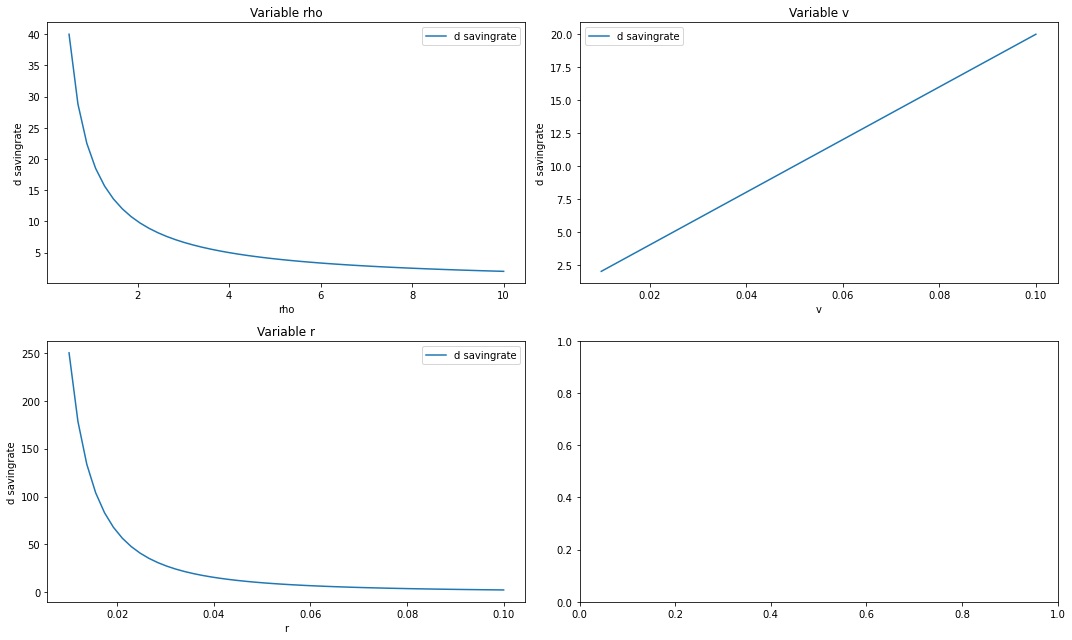

In [7]:
# variable rho
rho_1 = np.linspace(0.5, 10, 50)
v = 0.05
r = 0.05

d_zeta_1 = rho_1**(-1)*v*r**(-2)
# variable v
rho = 2
v_2 = np.linspace(0.01, 0.1, 50)
r = 0.05

d_zeta_2 = rho**(-1)*v_2*r**(-2)
# variable r
rho = 2
v = 0.05
r_3 = np.linspace(0.01, 0.1, 50)

d_zeta_3 = rho**(-1)*v*r_3**(-2)

# plot 
fig, bx = plt.subplots(2,2,figsize=[15,9])

# rho
bx[0,0].plot(rho_1, d_zeta_1, label='d savingrate')
bx[0,0].set_xlabel('rho')
bx[0,0].set_ylabel('d savingrate')
bx[0,0].title.set_text('Variable rho')
bx[0,0].legend()

#v
bx[0,1].plot(v_2,d_zeta_2, label='d savingrate')
bx[0,1].set_xlabel('v')
bx[0,1].set_ylabel('d savingrate')
bx[0,1].title.set_text('Variable v')
bx[0,1].legend()

# rho
bx[1,0].plot(r_3,d_zeta_3, label='d savingrate')
bx[1,0].set_xlabel('r')
bx[1,0].set_ylabel('d savingrate')
bx[1,0].title.set_text('Variable r')
bx[1,0].legend()


fig.tight_layout()

### Conclusion:
the response of the saving rate depends on v in a linear form. Additionally, the smaller rho and r, the larger the response.
1. The larger v, the smaller beta which is our patience factor. If the agent gets less patient, a change in r should increase savings larger.
1. the smaller rho, the larger the effect. Again, rho close to zero makes the houseold poised, with respect to when to consume. We now get the same results as for problem set 1.2, where we have seen that the effect depends on R*beta.
1. A interest rate close to zero amplifies the effect. As we have an infinite horizon model, a small increase from a small interest rate, can have large effects over many periods.